In [1]:
#MODULES:
import pandas as pd
import joblib as jb
# pip install scikit-learn
from nltk.corpus import stopwords
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

In [2]:
Data_Set_Path = "C:\\OneDrive\\Software\\Work_Spaces\\System_WorkSpace\\Data_WorkSpace\\Machine_Learning\\Sentimental_Analysis\\Data\\"
Res_Path = "C:\\OneDrive\\Software\\Work_Spaces\\System_WorkSpace\\Data_WorkSpace\\Machine_Learning\\Sentimental_Analysis\\RES\\"

File = "EDA_Analysed_SA_BD_DS.csv"

ds = pd.read_csv(Data_Set_Path+File,encoding='ISO-8859-1')
print(ds.shape)
print(ds.columns)
ds.describe()

(1048572, 6)
Index(['polarity_of_tweet', 'tweet_id', 'tweet_date', 'query', 'user',
       'tweet_text'],
      dtype='object')


,polarity_of_tweet,tweet_id
count,1.048572e+06,1.048572e+06
mean,9.482458e-01,1.976168e+09
std,1.701122e+00,2.300567e+08
min,0.000000e+00,1.467811e+09
25%,0.000000e+00,1.824526e+09
50%,0.000000e+00,1.990870e+09
75%,0.000000e+00,2.198903e+09
max,4.000000e+00,2.329206e+09


In [3]:
# Features and Target Variable Separation
Target_Variable = ds["polarity_of_tweet"]
Features = ds["tweet_text"]
nltk.download('stopwords')
'''
    The multinomial naive bayes algorithm only accepts, Textual Data of a Single field, in mutlinomial Distributed form, and analyses the probability relationship, between the subsequent words in the Data, inorder to classify it, 
    based on the frequency of the Words.
'''
#Features = ds.drop("sentiment",axis=1)
Features.reset_index(drop = True,inplace=True)
Target_Variable.reset_index(drop = True,inplace=True)
print(Features.shape)
print(Target_Variable.shape)


(1048572,)
(1048572,)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# Training and testing Data split:
X_Train,X_Test,Y_Train,Y_Test = train_test_split(Features,Target_Variable,test_size=0.25,random_state=42,stratify=Target_Variable)

In [5]:
#vectorizer = CountVectorizer(max_df=0.85, min_df=0.15)
vectorizer = CountVectorizer(max_df=0.1, min_df=0.0)
#vectorizer = CountVectorizer(stop_words='english')
#vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_Train)
X_test_vectorized = vectorizer.transform(X_Test)
# Y_test_vectorized = vectorizer.transform(Y_Test)      Since only, the input Textual Data is converted to numerial representation, for Model training and predictions.

print(X_train_vectorized.shape)
print(Y_Train.shape)
mn = MultinomialNB()
mn.fit(X_train_vectorized,Y_Train)

(786429, 396681)
(786429,)


MultinomialNB()

In [6]:
# Model prediction and Evaluation
predictions = mn.predict(X_test_vectorized)
accuracy = accuracy_score(Y_Test, predictions)
report = classification_report(Y_Test, predictions)

print(predictions)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

[0 0 0 ... 0 0 0]
Accuracy: 0.8322747508039505
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90    199999
           4       0.79      0.40      0.53     62144

    accuracy                           0.83    262143
   macro avg       0.81      0.68      0.72    262143
weighted avg       0.83      0.83      0.81    262143



In [7]:
# Model Evaluation:
comments = [" I`d have responded, if I were going",
            " 'Sons of ****'"," why couldn`t they put them on the releases we already bought",
            "Journey!? Wow... u just became cooler.  hehe... (is that possible!?)",
            "what interview! leave me alone",
            "Born and raised in NYC and living in Texas for the past 10 years!  I still miss NY",
            "Sooo SAD I will miss you here in San Diego!!!"]
predmap = {4:"positive",2:"neutral",0:"negative"}
commentsp = ["neutral","negative","negative","positive","negative","negatve","negative"]
commentsv = vectorizer.transform(comments)
predtns = mn.predict(commentsv)
prds=[]
for i in range(len(predtns)):
    prds.append(predmap[predtns[i]])
print(prds)
print(commentsp)

['negative', 'negative', 'negative', 'positive', 'negative', 'negative', 'negative']
['neutral', 'negative', 'negative', 'positive', 'negative', 'negatve', 'negative']


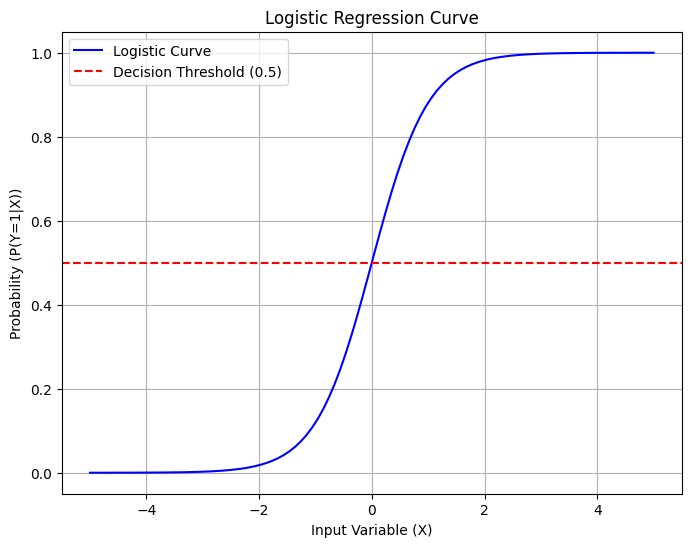

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define a range of values for the input variable (X)
X = np.linspace(-5, 5, 100)

# Calculate the corresponding probabilities using the logistic function
# In logistic regression, the logistic function is P(Y=1|X) = 1 / (1 + e^(-z))
# Here, we use a linear combination for simplicity: z = 2*X
# In practice, z would be calculated based on model coefficients.
z = 2 * X
probability = 1 / (1 + np.exp(-z))

# Create a plot to visualize the logistic curve
plt.figure(figsize=(8, 6))
plt.plot(X, probability, label='Logistic Curve', color='blue')
plt.xlabel('Input Variable (X)')
plt.ylabel('Probability (P(Y=1|X))')
plt.title('Logistic Regression Curve')
plt.axhline(y=0.5, color='red', linestyle='--', label='Decision Threshold (0.5)')
plt.legend()
plt.grid(True)
plt.show()





